#  Plotting the Backgrounds for the Significance of Correlations Statistic

**Paolo Marcoccia<sup>1</sup>, Felicia Frederiksson<sup>2</sup>, Alex B. Nielsen<sup>1</sup> and Germano Nardini<sup>1</sup>**

<sub>1. University of Stavanger, Institutt for Matematikk og Fysikk, Kjølv Egelands hus, 5.etg, E-blokk, 4021 Stavanger, Norway </sub> <br>
<sub>2. University of Uppsala, Department of Physics and Astronomy,Ångströmlaboratoriet, Lägerhyddsvägen 1, 751 20 Uppsala, Sweden</sub> 

We encourage use of these data in derivative works. If you use the material provided here, please cite [our paper.]()

In this notebook, we will learn how to generate the [AllBackgrounds.png](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/AllBackgrounds.png) figure, that will be needed to give a statistical significance to the obtained correlations for the various events.
All the following, may be considered as an application of the notebook by [A. Nielsen et al.](https://github.com/KuZa91/gw150914_investigation) for generating the [figure 3](https://github.com/KuZa91/gw150914_investigation/blob/master/Fig3_Background.ipynb) of the related paper, while additional informations on how to generate multiple subplots may be found in the book of [Jake VanderPlas D.S Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html).
In order to run this pipeline, however, you need to run the previously cited notebook by applying the 3 different frequency setup for the whitening used for the 4 various events, this analysis will be done on the [GW150914](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/tree/master/Code/GW150914) strain data, at the GPS time reported in [tevent.py](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/Backgrounds/tevent.py) that is 5 mins after the considered event coalescence time.
Furthermore, theorically we also need to generate the [CorrVsTime.csv](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/GW150914/CorrVsTime.csv) dataframe obtained by running the [CorrVsTime.ipynb](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/CorrVsTime.ipynb) in order to find the time of max correlation and the corresponding values of original strain correlation, and residual correlation for each of the considered event.
From the [Code](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code) directory, let's start by moving in the [backgrounds](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/tree/master/Code/Backgrounds) directory and loading the modules :

In [1]:
%cd Backgrounds/
%run init_module.py
%run EvCorr.py

/home/kuza91/Documents/IPyNB/GWO1/Backgrounds


Let's also run the [BigFont.py](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/BigFont.py) script in order to increase the font size of the plot.
The setting, may be easily changed from the previous file in order to personalize the final output of this notebook.

In [2]:
%run BigFont.py

and let's load the required datasets for the analysis :

In [3]:
dist_breal_small_freq = np.loadtxt('bkg_real50-230.txt')
dist_breal_mid_freq = np.loadtxt('bkg_real35-350.txt')
dist_breal_big_freq = np.loadtxt('bkg_real50-460.txt')
dist_bfake_small_freq = np.loadtxt('bkg_simulated50-230.txt')
dist_bfake_mid_freq = np.loadtxt('bkg_simulated35-350.txt')
dist_bfake_big_freq = np.loadtxt('bkg_simulated50-460.txt')

We may start plotting the results, let's create a multiple subplot :

Text(0.5,0.06,u'$C(\\tau, \\delta $\u03c4$, t, \\omega)$')

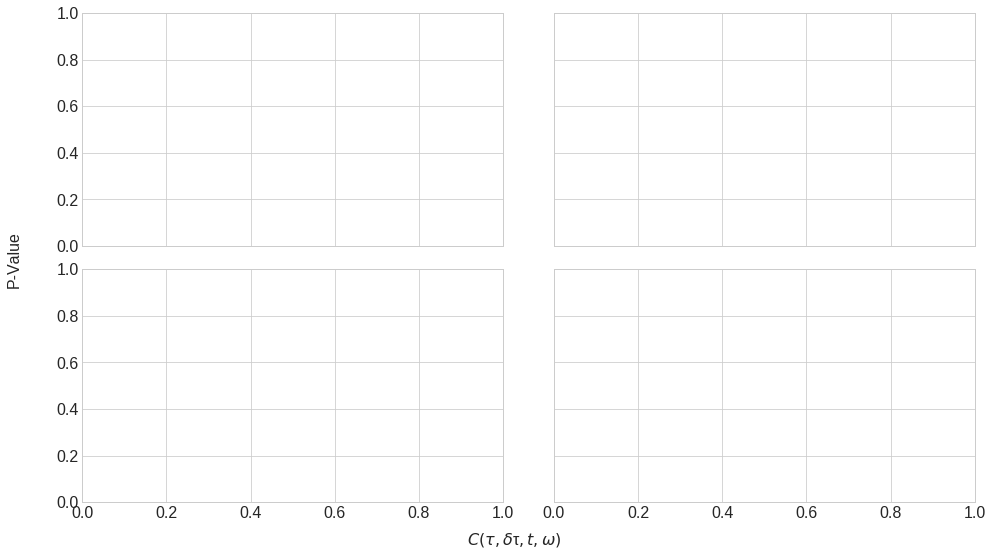

In [4]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize =[16,9])
plt.subplots_adjust(wspace = 0.12, hspace = 0.1)
fig.text(0.06, 0.5, 'P-Value', va = 'center', rotation='vertical')
fig.text(0.5, 0.06, r'$C(\tau, \delta $'+u'τ'+'$, t, \omega)$', ha = 'center')

The main structure of the plot is done, let's fullfill the single subplots :

In [5]:
# Plotting the GW150914 Background results

for dist, label, color, in zip([dist_breal_mid_freq, dist_bfake_mid_freq], ['Off-source LIGO Data Distribution', 'Colored Gaussian Noise Distribution'], ['black', 'crimson']):
    dist = np.array(dist)
    dist.sort()
    x = np.arange(len(dist), 0, -1)
    ax[0,0].plot(dist, x / float(len(x)), label=label, color=color)

ax[0,0].set_title('GW150914') 
ax[0,0].set_xlim(0,1)
ax[0,0].set_ylim(1e-6, 1e0)
ax[0,0].set_yscale('log')
ax[0,0].axvline(ev1_osc, label='Original Data Max Correlation', color='navy', linestyle='--')
ax[0,0].axvline(ev1_rc, label='Residuals Correlation at the time of Max Correlation', color='violet', linestyle='--')

In [6]:
# Plotting the GW151012 Background results

for dist, label, color, in zip([dist_breal_small_freq, dist_bfake_small_freq], ['Off-source LIGO Data Distribution', 'Colored Gaussian Noise Distribution'], ['black', 'crimson']):
    dist = np.array(dist)
    dist.sort()
    x = np.arange(len(dist), 0, -1)
    ax[0,1].plot(dist, x / float(len(x)), label=label, color=color)

ax[0,1].set_title('GW151012') 
ax[0,1].set_xlim(0,1)
ax[0,1].set_ylim(1e-6, 1e0)
ax[0,1].set_yscale('log')
ax[0,1].axvline(ev2_osc, label='Original Data Max Correlation', color='navy', linestyle='--')
ax[0,1].axvline(ev2_rc, label='Residuals Correlation at the time of Max Correlation', color='violet', linestyle='--')

In [7]:
# Plotting the GW151226 Background results

for dist, label, color, in zip([dist_breal_big_freq, dist_bfake_big_freq], ['Off-source LIGO Data Distribution', 'Colored Gaussian Noise Distribution'], ['black', 'crimson']):
    dist = np.array(dist)
    dist.sort()
    x = np.arange(len(dist), 0, -1)
    ax[1,0].plot(dist, x / float(len(x)), label=label, color=color)

ax[1,0].set_title('GW151226') 
ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(1e-6, 1e0)
ax[1,0].set_yscale('log')
ax[1,0].axvline(ev3_osc, label='Original Data Max Correlation', color='navy', linestyle='--')
ax[1,0].axvline(ev3_rc, label='Residuals Correlation at the time of Max Correlation', color='violet', linestyle='--')

In [8]:
# Plotting the GW170104 Background results

for dist, label, color, in zip([dist_breal_small_freq, dist_bfake_small_freq], ['Off-source LIGO Data Distribution', 'Colored Gaussian Noise Distribution'], ['black', 'crimson']):
    dist = np.array(dist)
    dist.sort()
    x = np.arange(len(dist), 0, -1)
    ax[1,1].plot(dist, x / float(len(x)), label=label, color=color)

ax[1,1].set_title('GW170104') 
ax[1,1].set_xlim(0,1)
ax[1,1].set_ylim(1e-6, 1e0)
ax[1,1].set_yscale('log')
ax[1,1].axvline(ev4_osc, label='Original Data Max Correlation', color='navy', linestyle='--')
ax[1,1].axvline(ev4_rc, label='Residuals Correlation', color='violet', linestyle='--')
ax[1,1].legend(loc = 3)

The figure obtained may be saved by running :

In [9]:
%cd .. 
fig.savefig('AllBackgrounds.png',dpi = 200)

/home/kuza91/Documents/IPyNB/GWO1
